Total Sales amount:  6183625.0
Total Boxes shipped  177007
Sales by Country:
Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1051792.0
USA            1035349.0
Name: Amount, dtype: float64
Top 5 Products: 
Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount, dtype: float64


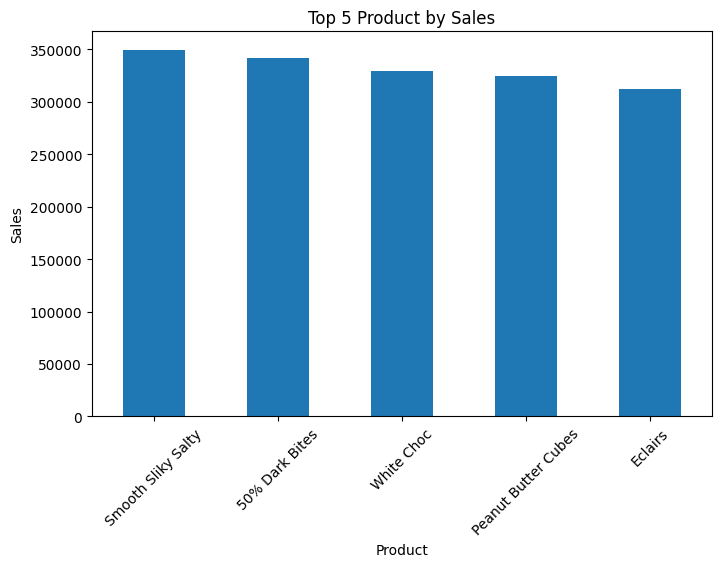

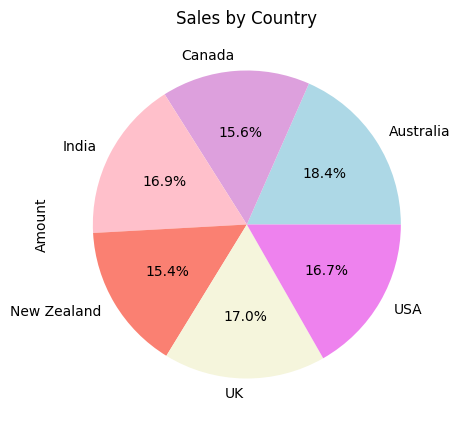

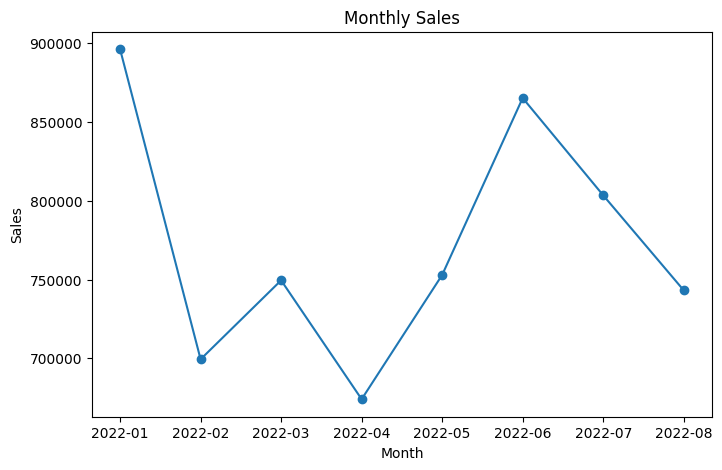

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# loading and cleaning data
df = pd.read_csv("/content/Chocolate Sales.csv")

df['Date'] = pd.to_datetime(df['Date'],format="%d-%b-%y")
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] =df['Amount'].astype(float)

# overall business performance
print("Total Sales amount: ", df['Amount'].sum())
print("Total Boxes shipped ", df['Boxes Shipped'].sum())

#sales by country
print("Sales by Country:")
print(df.groupby('Country')['Amount'].sum())

#top 5 products
print("Top 5 Products: ")
print(df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5))
product_sales= (df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5))

#bar chart for top 5 products
product_sales.plot(kind='bar', title='Top 5 Product by Sales', figsize=(8,5))
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks( rotation=45)
plt.show()

#pie chart for country-wise sales
country_sales=df.groupby('Country')['Amount'].sum()
colors=['lightblue','plum','pink','salmon','beige','violet']
country_sales.plot(kind='pie', title='Sales by Country', colors=colors,autopct='%1.1f%%',figsize=(6,5),)
plt.title('Sales by Country')
plt.show()

#line plot for monthly sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.index= monthly_sales.index.astype(str)
monthly_sales.plot(kind='line', marker='o' ,title='Monthly Sales', figsize=(8,5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()